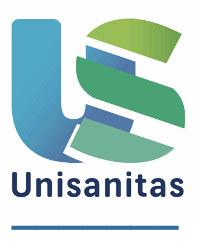


# Principios de programación y algoritmos en el ámbito biomédico 

# Lección 3. Procesamiento y visualización de información clínica

## Heart Failure Prediction Dataset

La insuficiencia cardíaca es un evento común causado por enfermedades cardiovasculares; este conjunto de datos contiene 12 características que pueden usarse para predecir la mortalidad por insuficiencia cardíaca.

La mayoría de las enfermedades cardiovasculares se pueden prevenir abordando diferentes factores de riesgo conductuales, como el tabaquismo, la dieta poco saludable y la obesidad, la inactividad física y el consumo nocivo de alcohol.

*Para consultar información adicional sobre el dataset puede dirigirse a:*

https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).



## Lectura del dataset

[**pandas**](https://pandas.pydata.org/)

In [1]:
import pandas as pd

In [2]:
url = 'datasets/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(url)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Exploración y manejo de datos

In [3]:
# Cabecera
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Dimensiones
df.shape

(299, 13)

In [5]:
# Nombres de las columnas (variables)
df.columns.values

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

In [6]:
# Resumen de los estadísticos básicos
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
# Tipo de datos en cada columna
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

### Subconjuntos

In [8]:
# Es posible seleccionar una característica/variable de los pacientes
df['age']

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

In [9]:
# Es posible seleccionar una característica/variable de los pacientes
df.age

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

In [10]:
# Es posible seleccionar varias características/variables de los pacientes
df[['age','diabetes','smoking']]

,age,diabetes,smoking
0,75.0,0,0
1,55.0,0,0
2,65.0,0,1
3,50.0,0,0
4,65.0,1,0
...,...,...,...
294,62.0,1,1
295,55.0,0,0
296,45.0,1,0
297,45.0,0,1


In [11]:
# Se puede acceder a una fila (información de un paciente) mediante el atributo iloc
df.iloc[0]

age                             75.0
anaemia                          0.0
creatinine_phosphokinase       582.0
diabetes                         0.0
ejection_fraction               20.0
high_blood_pressure              1.0
platelets                   265000.0
serum_creatinine                 1.9
serum_sodium                   130.0
sex                              1.0
smoking                          0.0
time                             4.0
DEATH_EVENT                      1.0
Name: 0, dtype: float64

In [12]:
# También se puede extraer un conjunto de filas (información de varios pacientes)
df.iloc[0:3]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [13]:
# Se puede acceder a un conjunto de filas (información de varios pacientes) y columnas específicas (características/variables)
df.iloc[0:3,0:4]

,age,anaemia,creatinine_phosphokinase,diabetes
0,75.0,0,582,0
1,55.0,0,7861,0
2,65.0,0,146,0


In [14]:
# Se puede acceder a un conjunto de filas (información de varios pacientes) y columnas específicas (características/variables)
df.loc[0:3, ['age','diabetes','smoking','DEATH_EVENT']]

,age,diabetes,smoking,DEATH_EVENT
0,75.0,0,0,1
1,55.0,0,0,1
2,65.0,0,1,1
3,50.0,0,0,1


También se pueden generar subconjuntos a partir de indexación booleana

In [15]:
# Se realiza un subconjunto con los pacientes fumadores
df[df['smoking']==1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10,1
9,80.0,1,123,0,35,1,388000.0,9.4,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.0,4.0,131,1,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0


In [16]:
# Se realiza un subconjunto con los pacientes mayores a 60 años
df[df['age']>60]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,65.0,0,1688,0,38,0,263358.03,1.1,138,1,1,250,0
288,65.0,0,892,1,35,0,263358.03,1.1,142,0,0,256,0
289,90.0,1,337,0,38,0,390000.00,0.9,144,0,0,256,0
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0


In [17]:
# También se pueden reiniciar los índices del dataframe
df[df['age']>60].reset_index()

,index,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
2,4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
4,6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,283,65.0,0,1688,0,38,0,263358.03,1.1,138,1,1,250,0
133,288,65.0,0,892,1,35,0,263358.03,1.1,142,0,0,256,0
134,289,90.0,1,337,0,38,0,390000.00,0.9,144,0,0,256,0
135,293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0


In [18]:
df[df['age']>60].reset_index(drop=True)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
4,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,65.0,0,1688,0,38,0,263358.03,1.1,138,1,1,250,0
133,65.0,0,892,1,35,0,263358.03,1.1,142,0,0,256,0
134,90.0,1,337,0,38,0,390000.00,0.9,144,0,0,256,0
135,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0


### Ordenamiento
Se puede ordenar la información por filas o por columnas.

In [19]:
# Ordenar el dataset de menor a mayor edad (ascendente)
df.sort_values(by='age')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
269,40.0,0,582,1,35,0,222000.00,1.00,132,1,0,244,0
232,40.0,1,129,0,35,0,255000.00,0.90,137,1,0,209,0
180,40.0,0,478,1,30,0,303000.00,0.90,136,1,0,148,0
242,40.0,0,90,0,35,0,255000.00,1.10,136,1,1,212,0
248,40.0,0,624,0,35,0,301000.00,1.00,142,1,1,214,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1


In [20]:
# Ordenar el dataset de mayor a menor edad (descendente)
df.sort_values(by='age', ascending=False)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
26,95.0,1,112,0,40,1,196000.00,1.00,138,0,0,24,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
36,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,40.0,0,244,0,45,1,275000.00,0.90,140,0,0,174,0
248,40.0,0,624,0,35,0,301000.00,1.00,142,1,1,214,0
206,40.0,1,101,0,40,0,226000.00,0.80,141,0,0,187,0
269,40.0,0,582,1,35,0,222000.00,1.00,132,1,0,244,0


In [21]:
# Resumen descriptivo
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Transformación de variables cuantitativas (número) a cualitativas (clase)

Se consideran las siguientes variables: 
<ul> 
  <li>Anaemia</li>
  <li>Diabetes</li>
  <li>High Blood Pressure</li>
  <li>Sex</li>
  <li>Smoking</li>
</ul>

In [22]:
df2 = df.copy()
df2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [23]:
# Anaemia
df2['anaemia'].replace(to_replace=[0,1], value=['No','Si'], inplace=True)
df2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,No,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,No,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,Si,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,Si,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [24]:
# Diabetes
df2['diabetes'].replace(to_replace=[0,1], value=['No','Si'], inplace=True)
df2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,No,7861,No,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,No,146,No,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,Si,111,No,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,Si,160,Si,20,0,327000.00,2.7,116,0,0,8,1


In [25]:
# High Blood Pressure
df2['high_blood_pressure'].replace(to_replace=[0,1], value=['No','Si'], inplace=True)
df2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Si,265000.00,1.9,130,1,0,4,1
1,55.0,No,7861,No,38,No,263358.03,1.1,136,1,0,6,1
2,65.0,No,146,No,20,No,162000.00,1.3,129,1,1,7,1
3,50.0,Si,111,No,20,No,210000.00,1.9,137,1,0,7,1
4,65.0,Si,160,Si,20,No,327000.00,2.7,116,0,0,8,1


In [26]:
# Sex
df2['sex'].replace(to_replace=[0,1], value=['F','M'], inplace=True)
df2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Si,265000.00,1.9,130,M,0,4,1
1,55.0,No,7861,No,38,No,263358.03,1.1,136,M,0,6,1
2,65.0,No,146,No,20,No,162000.00,1.3,129,M,1,7,1
3,50.0,Si,111,No,20,No,210000.00,1.9,137,M,0,7,1
4,65.0,Si,160,Si,20,No,327000.00,2.7,116,F,0,8,1


In [27]:
# Smoking
df2['smoking'].replace(to_replace=[0,1], value=['No','Si'], inplace=True)
df2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Si,265000.00,1.9,130,M,No,4,1
1,55.0,No,7861,No,38,No,263358.03,1.1,136,M,No,6,1
2,65.0,No,146,No,20,No,162000.00,1.3,129,M,Si,7,1
3,50.0,Si,111,No,20,No,210000.00,1.9,137,M,No,7,1
4,65.0,Si,160,Si,20,No,327000.00,2.7,116,F,No,8,1


## Visualización de datos

[**Matplotlib**](https://matplotlib.org/)

[**seaborn**](https://seaborn.pydata.org/)

In [28]:
import matplotlib.pyplot as plt

### Histograma

(array([37., 37., 39., 55., 46., 40., 19., 12.,  8.,  6.]),
 array([40. , 45.5, 51. , 56.5, 62. , 67.5, 73. , 78.5, 84. , 89.5, 95. ]),
 <BarContainer object of 10 artists>)

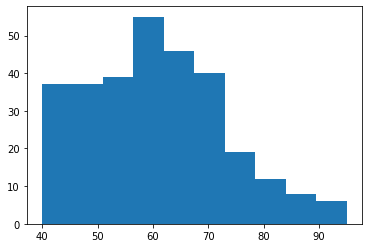

In [29]:
plt.hist(df2['age'])

Text(0.5, 1.0, 'Histograma de la edad de los pacientes')

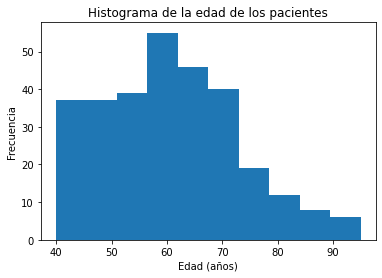

In [30]:
plt.hist(df2['age'])
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la edad de los pacientes')

### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x20a5b412fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x20a5b422760>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a5b412c40>],
 'medians': [<matplotlib.lines.Line2D at 0x20a5b422e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x20a5b42c250>],
 'means': []}

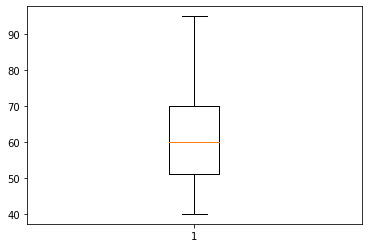

In [31]:
plt.boxplot(df2['age'])

Text(0.5, 1.0, 'Boxplot de la edad de los pacientes')

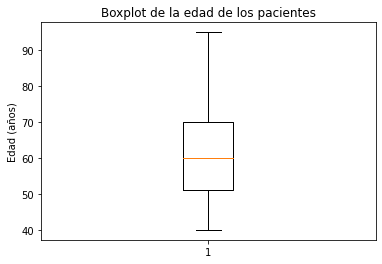

In [32]:
plt.boxplot(df2['age'])
plt.ylabel('Edad (años)')
plt.title('Boxplot de la edad de los pacientes')

## Exportar datos

In [33]:
# Guardar datos procesados en archivo csv
df2.to_csv('datasets/heart_failure_dataset_v2_1.csv')

In [34]:
# Guardar datos procesados en archivo csv (sin índices)
df2.to_csv('datasets/heart_failure_dataset_v2_2.csv', index=False)

In [35]:
# Guardar datos procesados en archivo excel (sin índices)
df2.to_excel('datasets/heart_failure_dataset_v2.xlsx', index=False)

## Información adicional: [**Anaconda**](https://www.anaconda.com/)